In [1]:
import matplotlib
#matplotlib.use('TKagg')
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import json 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def json_load(filename):
   with open(filename) as f_in:
       return(json.load(f_in)["mean"]["point_estimate"])

In [3]:
def load_files(dirname):
    folders = os.listdir(dirname)
    #print(folders)
    csv_files = list(map(lambda name: os.path.join(os.path.join(dirname, name),'new/raw.csv'), folders))

    #print(csv_files)


    df_from_each_file = (pd.read_csv(f, sep=',') for f in csv_files)
    #print(list(df_from_each_file))
    df_from_each_file = (f.head(1) for f in df_from_each_file)
    #print(list(df_from_each_file))
    return df_from_each_file
dirname = './benchmarks_schedulers/sequential_par_iter'
df_from_each_file = list(load_files(dirname)) 


In [4]:
df_merged   = pd.concat(df_from_each_file, ignore_index=True)

del df_merged["group"]
del df_merged["throughput_type"]
del df_merged["sample_measured_value"]
del df_merged["unit"]
del df_merged["iteration_count"]



In [5]:
folders = df_merged['value']
df_merged["time"] = list(map(lambda name: json_load(os.path.join(os.path.join(dirname, name),'new/estimates.json')), folders))



In [6]:

time = df_merged['time']
value = df_merged['value']

In [7]:
def size_calculation(value):
    element_size = int(value.split("-")[0])
    vector_size = int(value.split("-")[1])
    matrixs_size =  (((32 * element_size * element_size) * 3) * 2) * vector_size
    #normal_elements_size = ((6 * 32 * 1000) + (2 * 32 * 1000) + (6 * 32)) * vector_size
   
    return matrixs_size /8

In [8]:
#df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(throughput_num, time))))
#df_merged['size'] = list(map(lambda value: value/(1024**2), throughput_num))
#df_merged['time'] = list(map(lambda value: value/1000000, time))
#df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
#df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))



del df_merged["throughput_num"]
df_merged['element_size'] = list(map(lambda size:  int(size.split("-")[0]),value))
df_merged['vector_size'] = list(map(lambda size: int(size.split("-")[1]),value))
df_merged["throughput_num"] = list(map(lambda v: size_calculation(v), value))
df_merged['time'] = list(map(lambda value: value/1000000, time))
df_merged["throughput"] = list(map(lambda ab: float(ab[0]/ab[1]) ,list(zip(df_merged["throughput_num"], df_merged['time']))))
df_merged['size'] = list(map(lambda value: value/(1024**2), df_merged["throughput_num"]))




In [9]:
a = df_merged.sort_values(by=["size"], ascending=False)
b = df_merged.sort_values(by=["time"], ascending=True)
#a.to_csv( "merged.csv")
#b.to_csv( "merged2.csv")


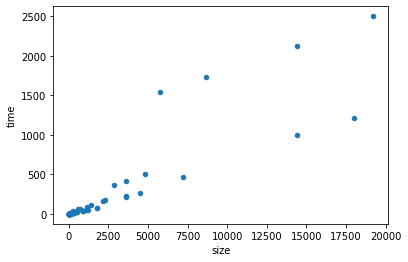

In [10]:

a.plot(x='size', y='time', kind = 'scatter')
plt.show()

<AxesSubplot:xlabel='size'>

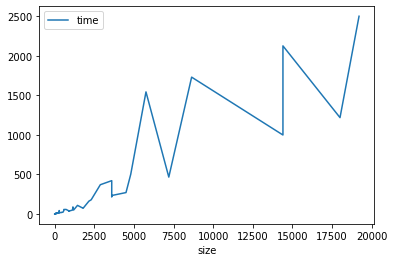

In [11]:
a.plot(x='size', y="time")

<AxesSubplot:xlabel='size', ylabel='time'>

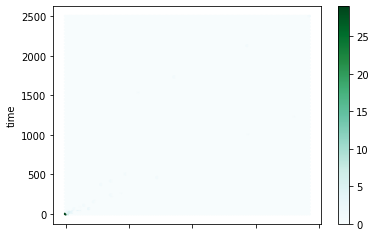

In [12]:
a.plot(x='size', y="time", kind='hexbin')

<AxesSubplot:xlabel='time', ylabel='size'>

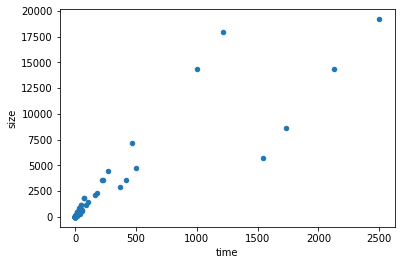

In [13]:
a.plot(x='time', y='size', kind = 'scatter')

<AxesSubplot:xlabel='time'>

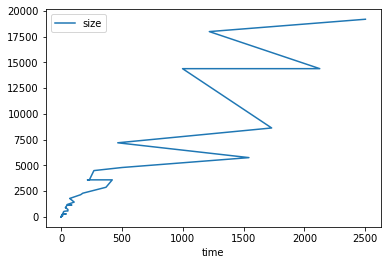

In [14]:
a.plot(x='time', y='size')


In [15]:
a

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,sequential_par_iter,1024-800,2501.658810,1024,800,2.013266e+10,8.047724e+06,19200.00000
59,sequential_par_iter,256-12000,1218.767347,256,12000,1.887437e+10,1.548644e+07,18000.00000
27,sequential_par_iter,1024-600,2126.590392,1024,600,1.509949e+10,7.100330e+06,14400.00000
21,sequential_par_iter,256-9600,998.793622,256,9600,1.509949e+10,1.511773e+07,14400.00000
46,sequential_par_iter,1024-360,1731.006251,1024,360,9.059697e+09,5.233775e+06,8640.00000
...,...,...,...,...,...,...,...,...
17,sequential_par_iter,64-24,0.364918,64,24,2.359296e+06,6.465276e+06,2.25000
10,sequential_par_iter,32-48,0.109812,32,48,1.179648e+06,1.074246e+07,1.12500
45,sequential_par_iter,64-12,0.331017,64,12,1.179648e+06,3.563704e+06,1.12500
57,sequential_par_iter,32-24,0.183531,32,24,5.898240e+05,3.213762e+06,0.56250


In [16]:
b.loc[b['time']  > 500 ]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
69,sequential_par_iter,512-800,502.395778,512,800,5.033165e+09,1.001833e+07,4800.0
21,sequential_par_iter,256-9600,998.793622,256,9600,1.509949e+10,1.511773e+07,14400.0
59,sequential_par_iter,256-12000,1218.767347,256,12000,1.887437e+10,1.548644e+07,18000.0
23,sequential_par_iter,1024-240,1544.301103,1024,240,6.039798e+09,3.911023e+06,5760.0
46,sequential_par_iter,1024-360,1731.006251,1024,360,9.059697e+09,5.233775e+06,8640.0
27,sequential_par_iter,1024-600,2126.590392,1024,600,1.509949e+10,7.100330e+06,14400.0
9,sequential_par_iter,1024-800,2501.658810,1024,800,2.013266e+10,8.047724e+06,19200.0


In [17]:
b

,function,value,time,element_size,vector_size,throughput_num,throughput,size
10,sequential_par_iter,32-48,0.109812,32,48,1.179648e+06,1.074246e+07,1.12500
57,sequential_par_iter,32-24,0.183531,32,24,5.898240e+05,3.213762e+06,0.56250
55,sequential_par_iter,32-12,0.186754,32,12,2.949120e+05,1.579146e+06,0.28125
62,sequential_par_iter,32-96,0.196539,32,96,2.359296e+06,1.200420e+07,2.25000
35,sequential_par_iter,32-120,0.235599,32,120,2.949120e+06,1.251753e+07,2.81250
...,...,...,...,...,...,...,...,...
59,sequential_par_iter,256-12000,1218.767347,256,12000,1.887437e+10,1.548644e+07,18000.00000
23,sequential_par_iter,1024-240,1544.301103,1024,240,6.039798e+09,3.911023e+06,5760.00000
46,sequential_par_iter,1024-360,1731.006251,1024,360,9.059697e+09,5.233775e+06,8640.00000
27,sequential_par_iter,1024-600,2126.590392,1024,600,1.509949e+10,7.100330e+06,14400.00000


<AxesSubplot:xlabel='time'>

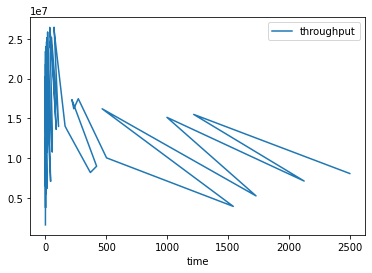

In [18]:
a.plot(x='time', y='throughput')


<AxesSubplot:xlabel='size'>

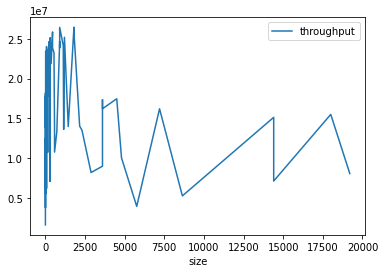

In [19]:
a.plot(x='size', y='throughput')


<AxesSubplot:xlabel='vector_size'>

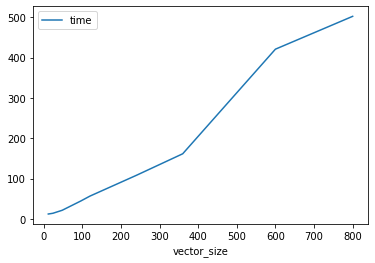

In [20]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

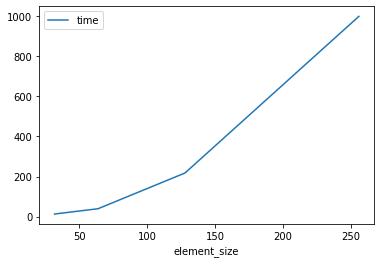

In [21]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='time')


<AxesSubplot:xlabel='vector_size'>

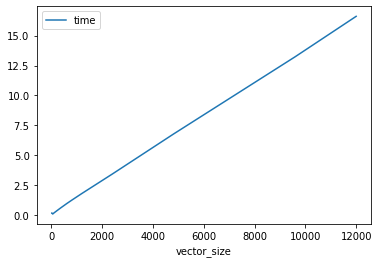

In [22]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='time')


<AxesSubplot:xlabel='element_size'>

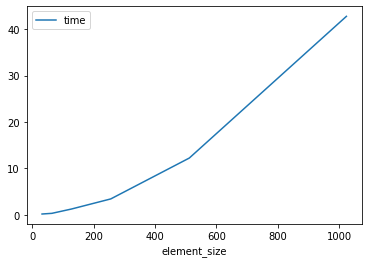

In [23]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='time')


In [24]:
a[a.value.str.contains(r".*-800$")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
9,sequential_par_iter,1024-800,2501.658810,1024,800,2.013266e+10,8.047724e+06,19200.00
69,sequential_par_iter,512-800,502.395778,512,800,5.033165e+09,1.001833e+07,4800.00
52,sequential_par_iter,256-800,49.940647,256,800,1.258291e+09,2.519573e+07,1200.00
48,sequential_par_iter,128-800,12.510178,128,800,3.145728e+08,2.514535e+07,300.00
66,sequential_par_iter,64-800,3.443761,64,800,7.864320e+07,2.283643e+07,75.00
65,sequential_par_iter,32-800,1.267135,32,800,1.966080e+07,1.551595e+07,18.75


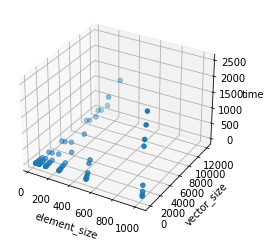

In [25]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(a['element_size'], a['vector_size'],a['time'])
threedee.set_xlabel('element_size')
threedee.set_ylabel('vector_size')
threedee.set_zlabel('time')
plt.show()

No handles with labels found to put in legend.


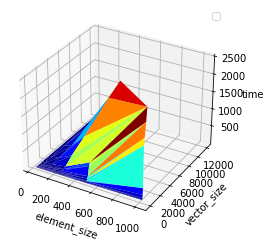

In [26]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()

ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.jet, linewidth=0.2)
plt.show()

No handles with labels found to put in legend.


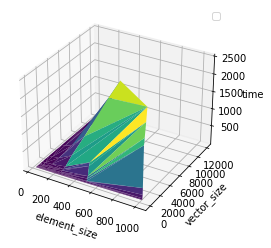

In [27]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['element_size'], a['vector_size'],a['time'], cmap=plt.cm.viridis, linewidth=0.2)
ax.set_xlabel("element_size")
ax.set_ylabel("vector_size")
ax.set_zlabel("time")
ax.legend()
plt.show()

No handles with labels found to put in legend.


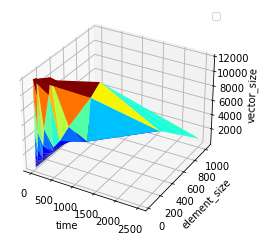

In [28]:
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(a['time'], a['element_size'],a['vector_size'], cmap=plt.cm.jet, linewidth=0.1)
ax.set_xlabel("time")
ax.set_ylabel("element_size")
ax.set_zlabel("vector_size")
ax.legend()
plt.show()

<AxesSubplot:xlabel='element_size'>

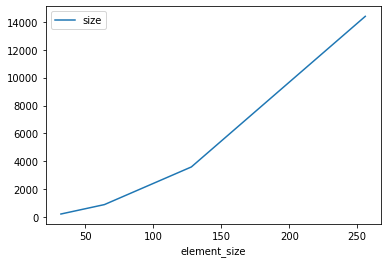

In [29]:
a[a.value.str.contains(r".*-9600")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='element_size'>

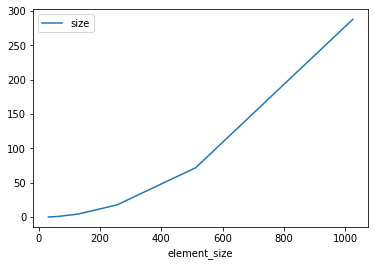

In [30]:
a[a.value.str.contains(r".*-12$")].plot(x='element_size', y='size')


<AxesSubplot:xlabel='vector_size'>

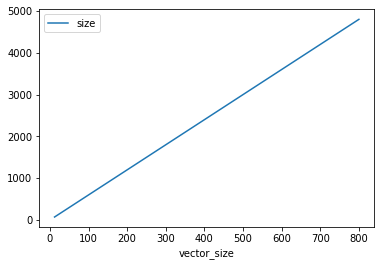

In [31]:
a[a.value.str.contains(r"^512")].plot(x='vector_size', y='size')


<AxesSubplot:xlabel='vector_size'>

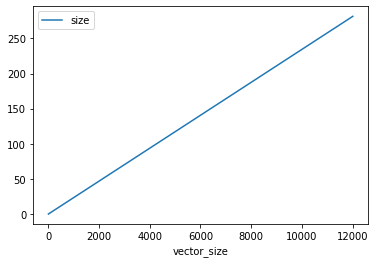

In [32]:
a[a.value.str.contains(r"^32")].plot(x='vector_size', y='size')


In [33]:
b[b.value.str.contains(r"^512")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
49,sequential_par_iter,512-12,12.256028,512,12,7.549747e+07,6.160028e+06,72.0
32,sequential_par_iter,512-24,14.104356,512,24,1.509949e+08,1.070555e+07,144.0
38,sequential_par_iter,512-48,21.515213,512,48,3.019899e+08,1.403611e+07,288.0
4,sequential_par_iter,512-96,44.465277,512,96,6.039798e+08,1.358318e+07,576.0
12,sequential_par_iter,512-120,56.733901,512,120,7.549747e+08,1.330729e+07,720.0
72,sequential_par_iter,512-240,108.161844,512,240,1.509949e+09,1.396009e+07,1440.0
71,sequential_par_iter,512-360,161.599321,512,360,2.264924e+09,1.401568e+07,2160.0
39,sequential_par_iter,512-600,420.960846,512,600,3.774874e+09,8.967280e+06,3600.0
69,sequential_par_iter,512-800,502.395778,512,800,5.033165e+09,1.001833e+07,4800.0


In [34]:
b[b.value.str.contains(r"^1024")]

,function,value,time,element_size,vector_size,throughput_num,throughput,size
67,sequential_par_iter,1024-12,42.807860,1024,12,3.019899e+08,7.054543e+06,288.0
37,sequential_par_iter,1024-24,56.205088,1024,24,6.039798e+08,1.074600e+07,576.0
50,sequential_par_iter,1024-48,88.833829,1024,48,1.207960e+09,1.359797e+07,1152.0
24,sequential_par_iter,1024-96,178.902957,1024,96,2.415919e+09,1.350408e+07,2304.0
30,sequential_par_iter,1024-120,369.516610,1024,120,3.019899e+09,8.172566e+06,2880.0
23,sequential_par_iter,1024-240,1544.301103,1024,240,6.039798e+09,3.911023e+06,5760.0
46,sequential_par_iter,1024-360,1731.006251,1024,360,9.059697e+09,5.233775e+06,8640.0
27,sequential_par_iter,1024-600,2126.590392,1024,600,1.509949e+10,7.100330e+06,14400.0
9,sequential_par_iter,1024-800,2501.658810,1024,800,2.013266e+10,8.047724e+06,19200.0
